In [2]:
from pathlib import Path

from prepare_data import get_dataframe

crud = get_dataframe(
    Path("../../Static Analysis/impl-crud/crud_dependency-CLASS.csv"),
    application="CRUD"
)
cqrs = get_dataframe(
    Path("../../Static Analysis/impl-es-cqrs/es-cqrs-dependency-CLASS.csv"),
    application="ES CQRS"
)

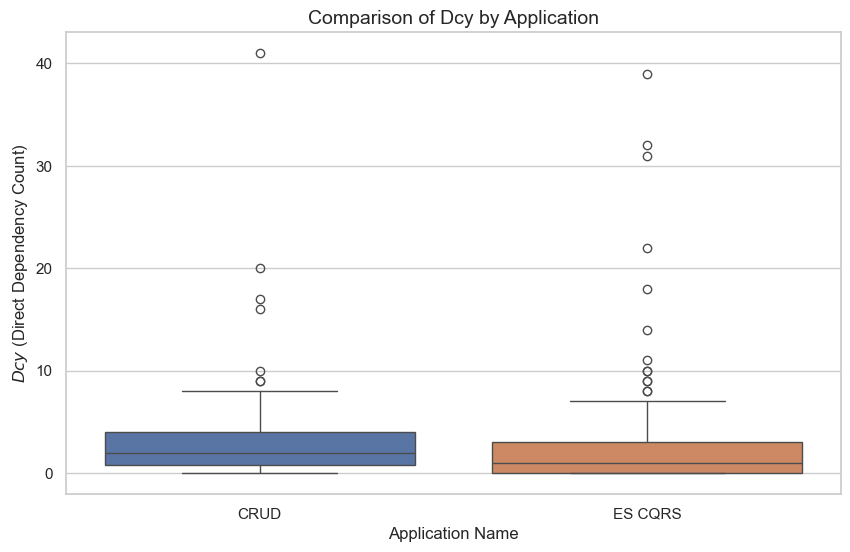

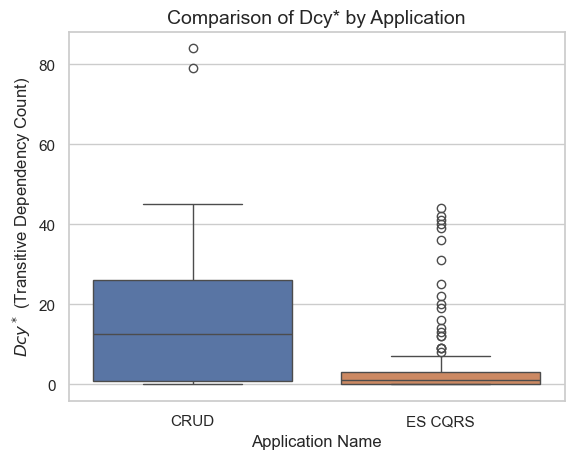

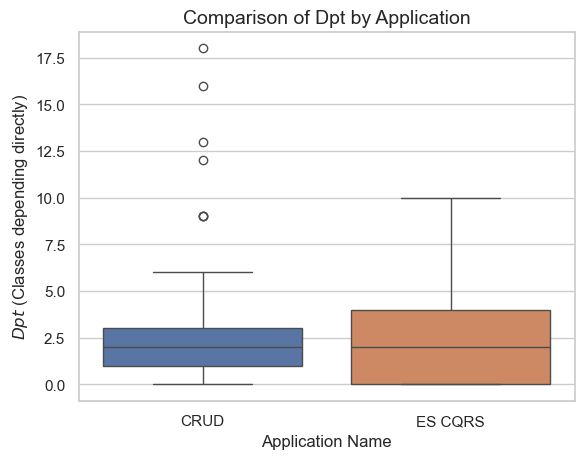

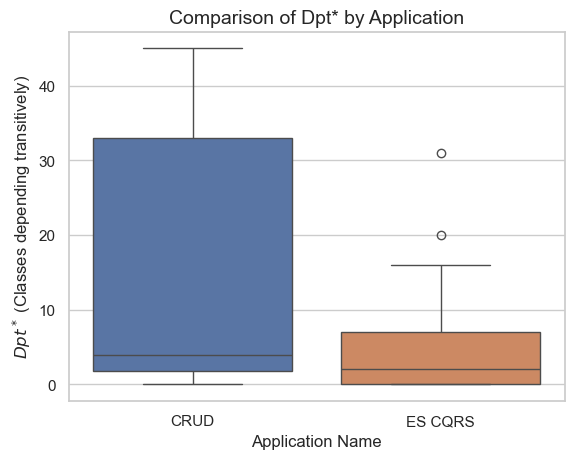

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.concat([crud, cqrs], ignore_index=True)

metrics = {
    "Dcy": "$Dcy$ (Direct Dependency Count)",
    "Dcy*": "$Dcy^*$ (Transitive Dependency Count)",
    "Dpt": "$Dpt$ (Classes depending directly)",
    "Dpt*": "$Dpt^*$ (Classes depending transitively)",
}

plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid")

for name, title in metrics.items():
    # Plotting Application on X and Dcy* on Y
    plot = sns.boxplot(data=dataset, x='Application', y=name, hue="Application")

    # 4. Add labels and title
    plt.title(f'Comparison of {name} by Application', fontsize=14)
    plt.xlabel('Application Name', fontsize=12)
    plt.ylabel(title, fontsize=12)

    plt.show()

